# explore targeted

In [1]:
from logging_ import Logger
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2


best_wrt_sample = True


In [2]:
logger = Logger(logs_dir="logs_targeted")

In [3]:
logger.load_all()
logger.logs_dir="logs_art_add_fmn_to_aa"
logger.load_all()
logger.logs_dir="logs_alma"
logger.load_all()

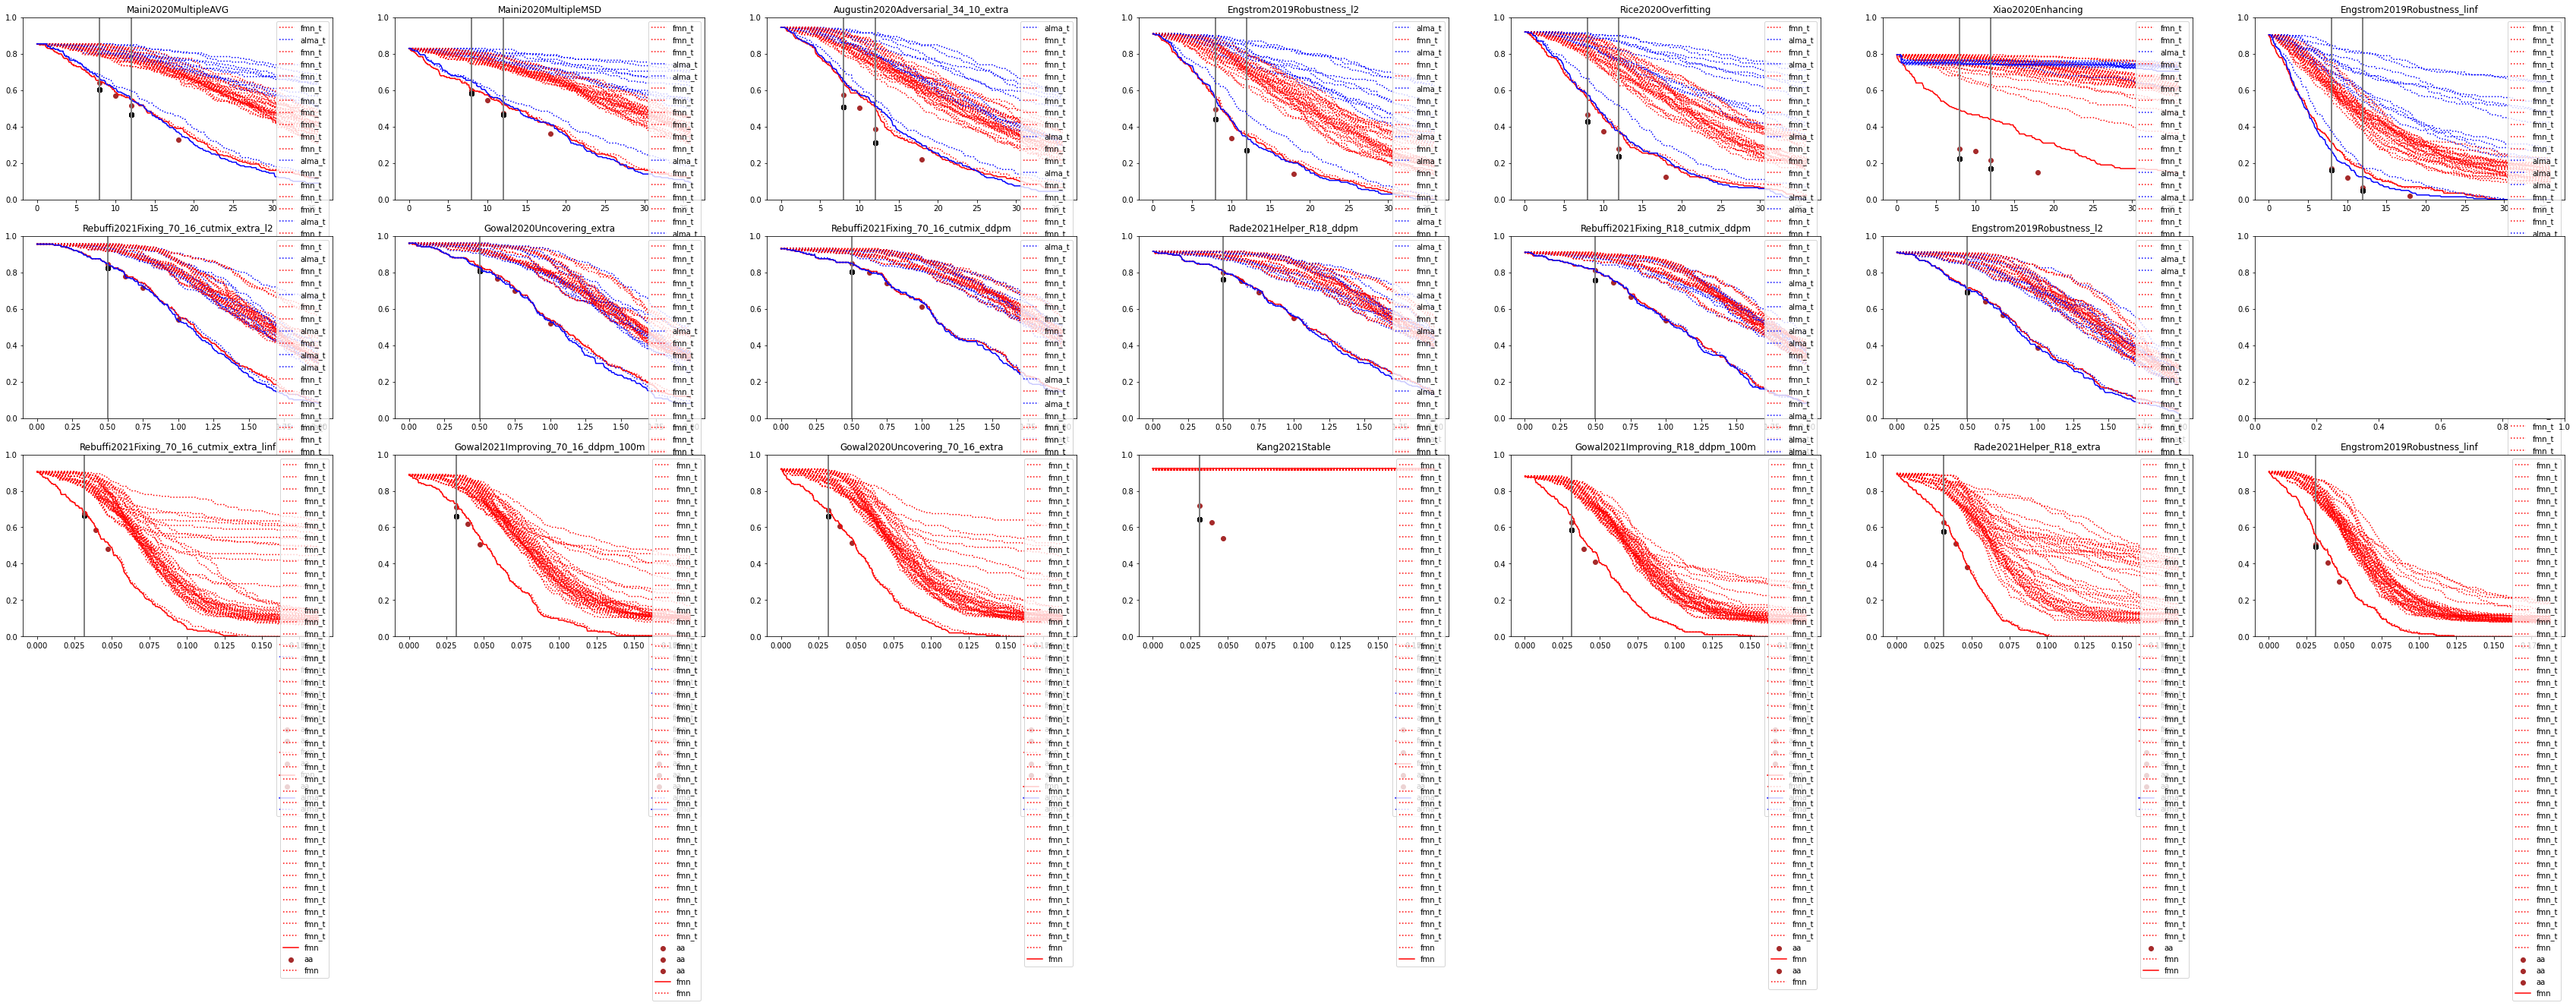

In [4]:
logger.plot_SE_grid(figsize=(60,15))

In [5]:
from scores import SCORES
from settings import OPTIMAL_HYPERS_BEST, OPTIMAL_HYPERS_NORM
# DECIDE WHETHER TO add "all" versions wrt individual samples or not


# for norm in OPTIMAL_HYPERS_NORM:
#         for model in SCORES[norm][0]:
#             logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-auto_all-model-{model}", [*logger.where(norm=norm, attack="aa", model=model).keys()])

if best_wrt_sample:
    OPTIMAL_HYPERS = OPTIMAL_HYPERS_BEST
else:
    OPTIMAL_HYPERS = OPTIMAL_HYPERS_NORM
for norm in OPTIMAL_HYPERS:
    for model in SCORES[norm][0]:
        for attack in ["fmn_t", "alma_t"]:
            run_ids = [*list(logger.where(model=model, attack=attack, **OPTIMAL_HYPERS[norm]).keys())]
            is_slow = lambda x: logger.get_n_steps(x) > 999
            quick_ids = [*filter(lambda x: not is_slow(x), run_ids)]
            slow_ids = [*filter(is_slow, run_ids)]
            if slow_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack[:-2]}_all-model-{model}-steps-1001", slow_ids)
            if quick_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack[:-2]}_all-model-{model}-steps-101", quick_ids)

OPTIMAL_HYPERS = OPTIMAL_HYPERS_NORM

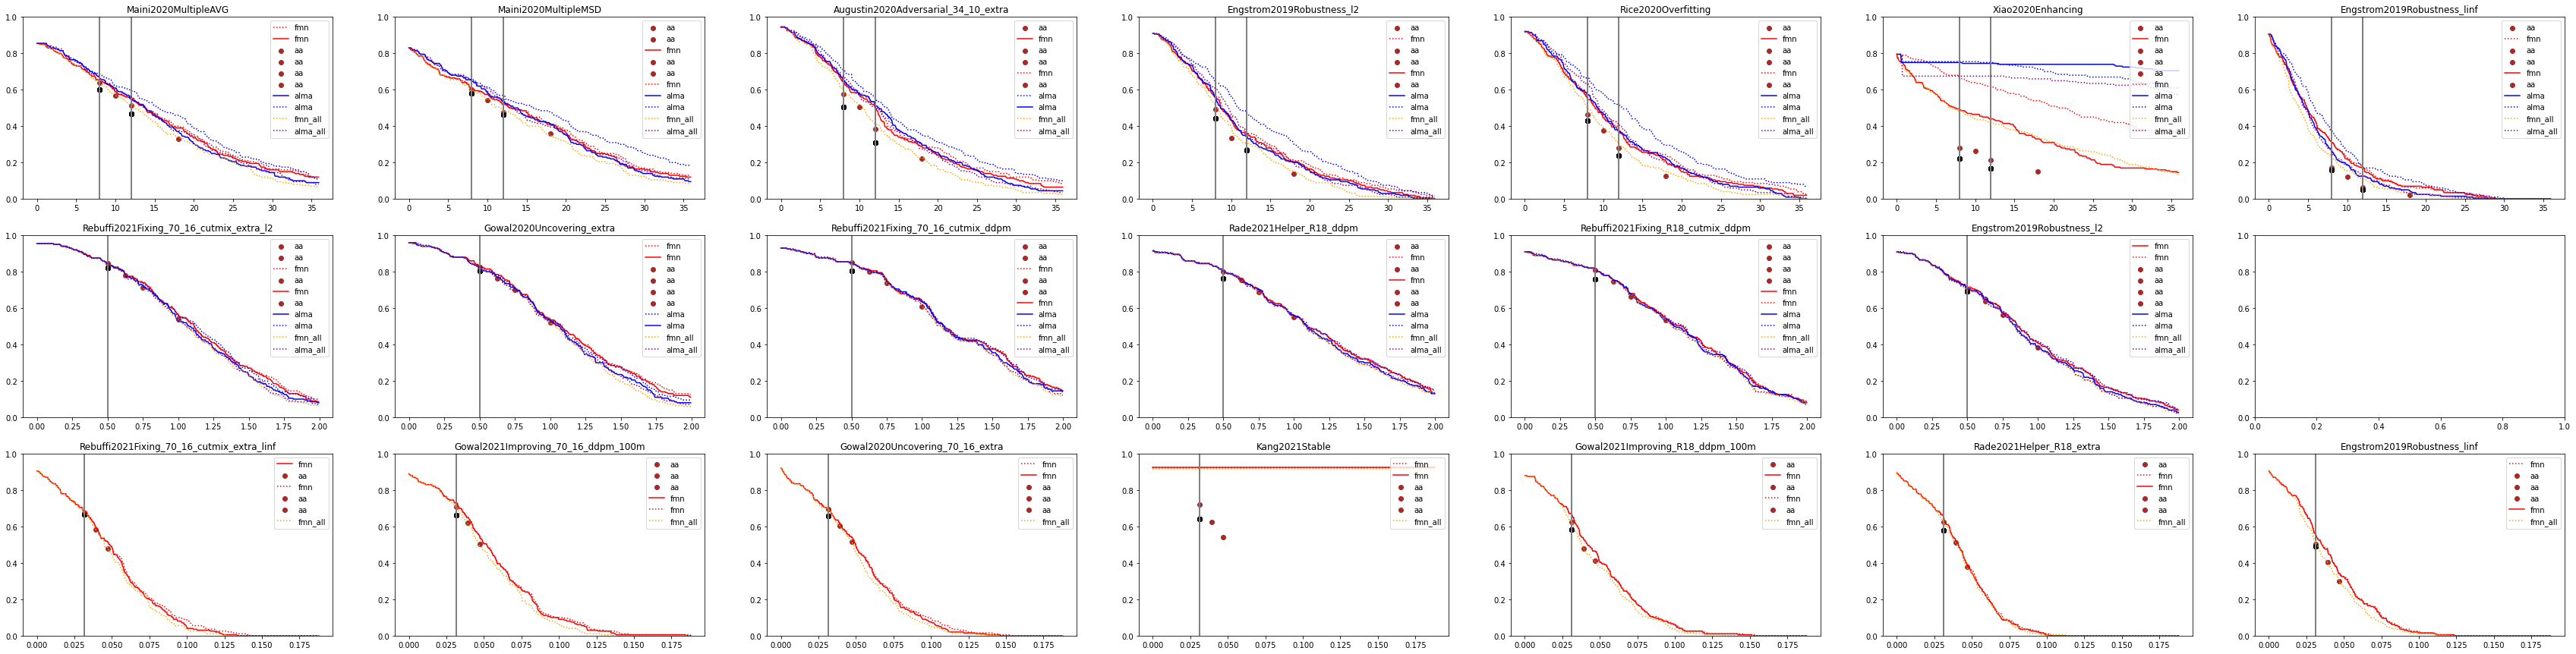

In [6]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"target":"x"})

In [7]:
# FMN 100 untargeted + 100 targeted to each class
# ALMA 100 untargeted + 100 targeted to each class


# for norm in OPTIMAL_HYPERS_NORM:
#         for model in SCORES[norm][0]:
#             logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-auto_all-model-{model}", [*logger.where(norm=norm, attack="aa", model=model).keys()])

if best_wrt_sample:
    OPTIMAL_HYPERS = OPTIMAL_HYPERS_BEST
else:
    OPTIMAL_HYPERS = OPTIMAL_HYPERS_NORM
for norm in OPTIMAL_HYPERS:
    for model in SCORES[norm][0]:
        if "Xiao" in model or "Kang" in model:
            continue
        for attack in ["fmn", "alma"]:
            run_ids = [*list(logger.where(model=model, attack=attack, **OPTIMAL_HYPERS[norm]).keys())] + [*list(logger.where(model=model, attack=attack+"_all", **OPTIMAL_HYPERS[norm]).keys())]
            is_slow = lambda x: logger.get_n_steps(x) > 999
            quick_ids = [*filter(lambda x: not is_slow(x), run_ids)]
            if quick_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack}_all-model-{model}-steps-101", quick_ids)

OPTIMAL_HYPERS = OPTIMAL_HYPERS_NORM

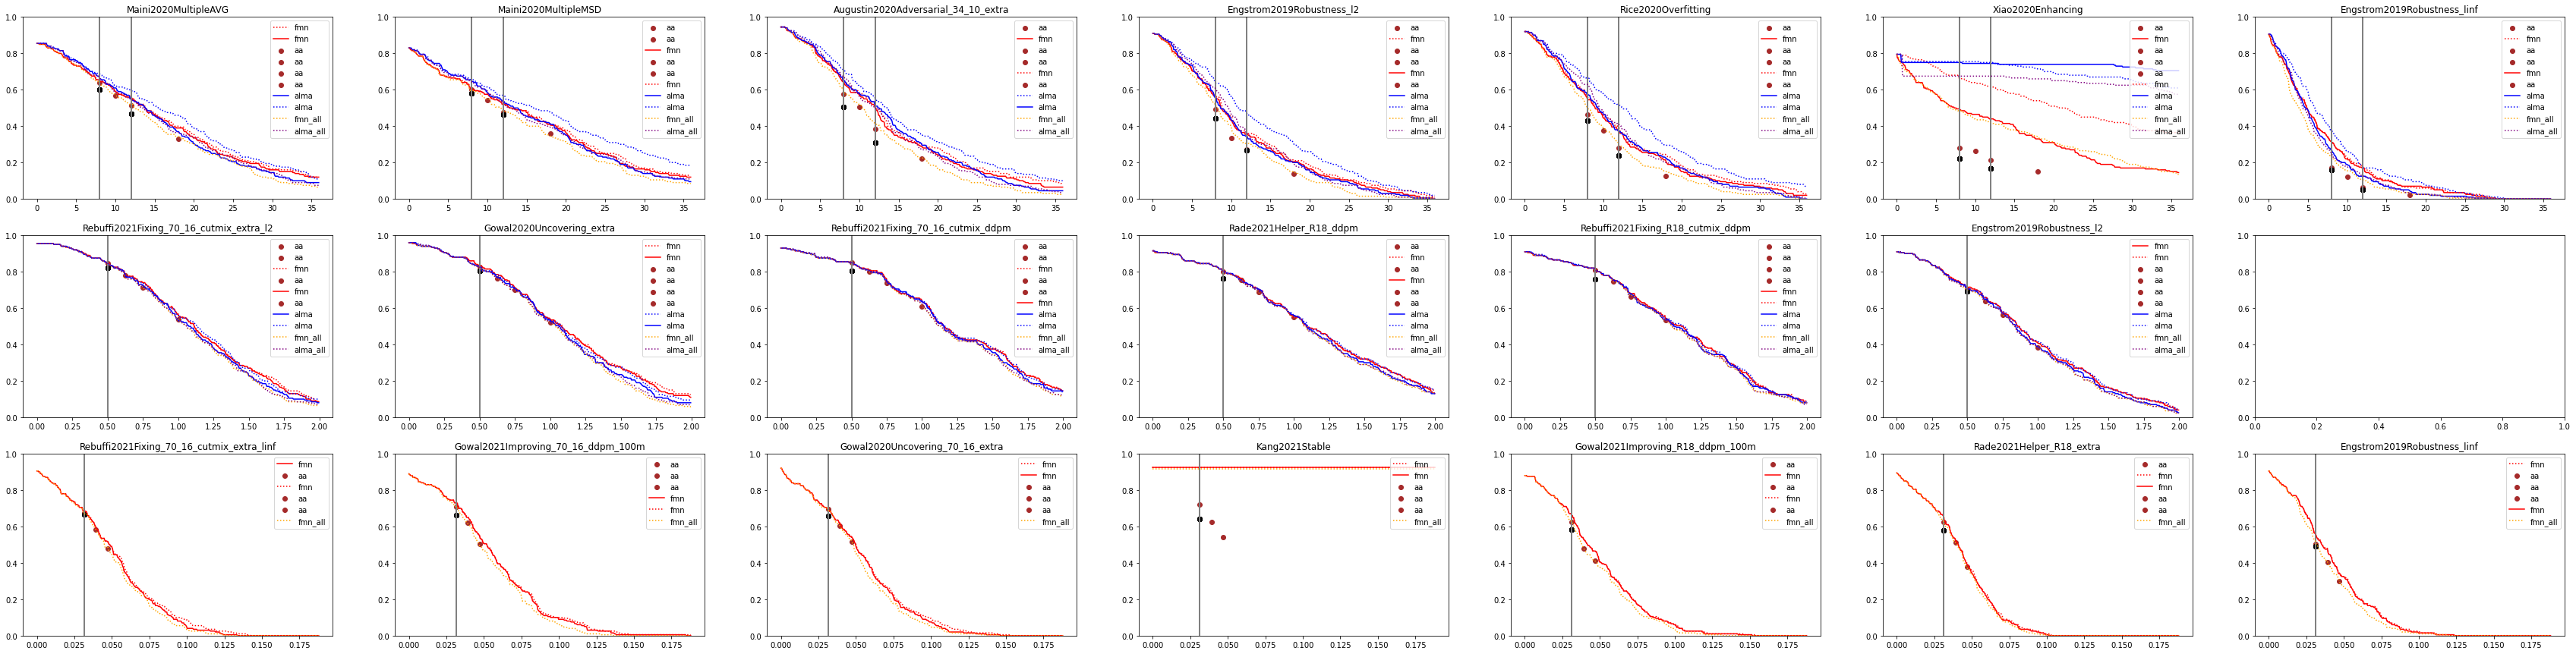

In [8]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"target":"x"})

In [9]:
report = logger.report_ra(logger.where(norm="Linf"), eps=8/255+0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                      attack 
Engstrom2019Robustness_linf                aa         0.505
                                           fmn        0.550
                                           fmn_all    0.510
                                           fmn_t      0.740
Gowal2020Uncovering_70_16_extra            aa         0.695
                                           fmn        0.695
                                           fmn_all    0.695
                                           fmn_t      0.820
Gowal2021Improving_70_16_ddpm_100m         aa         0.710
                                           fmn        0.730
                                           fmn_all    0.710
                                           fmn_t      0.815
Gowal2021Improving_R18_ddpm_100m           aa         0.625
                                           fmn        0.660
                                           fmn_all    0.625
                                           fmn_t 

In [10]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report[report.attack != "aa"].groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Engstrom2019Robustness_linf                 -0.005
Gowal2020Uncovering_70_16_extra              0.000
Gowal2021Improving_70_16_ddpm_100m           0.000
Gowal2021Improving_R18_ddpm_100m             0.000
Kang2021Stable                              -0.195
Rade2021Helper_R18_extra                     0.000
Rebuffi2021Fixing_70_16_cutmix_extra_linf    0.000
Name: rob_acc, dtype: float64

In [11]:
report = logger.report_ra(logger.where(norm="L2"), eps=0.5+ 0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                    attack  
Engstrom2019Robustness_l2                aa          0.700
                                         alma        0.705
                                         alma_all    0.705
                                         alma_t      0.845
                                         fmn         0.715
                                         fmn_all     0.700
                                         fmn_t       0.850
Gowal2020Uncovering_extra                aa          0.825
                                         alma        0.825
                                         alma_all    0.825
                                         alma_t      0.905
                                         fmn         0.835
                                         fmn_all     0.825
                                         fmn_t       0.915
Rade2021Helper_R18_ddpm                  aa          0.800
                                         alma        0.800
      

In [12]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report[report.attack != "aa"].groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Engstrom2019Robustness_l2                  0.0
Gowal2020Uncovering_extra                  0.0
Rade2021Helper_R18_ddpm                    0.0
Rebuffi2021Fixing_70_16_cutmix_ddpm        0.0
Rebuffi2021Fixing_70_16_cutmix_extra_l2    0.0
Rebuffi2021Fixing_R18_cutmix_ddpm          0.0
Name: rob_acc, dtype: float64

In [13]:
report = logger.report_ra(logger.where(norm="L1"), eps=8+ 0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                attack  
Augustin2020Adversarial_34_10_extra  aa          0.575
                                     alma        0.650
                                     alma_all    0.675
                                     alma_t      0.860
                                     fmn         0.640
                                     fmn_all     0.590
                                     fmn_t       0.795
Engstrom2019Robustness_l2            aa          0.495
                                     alma        0.560
                                     alma_all    0.605
                                     alma_t      0.800
                                     fmn         0.555
                                     fmn_all     0.510
                                     fmn_t       0.735
Engstrom2019Robustness_linf          aa          0.170
                                     alma        0.265
                                     alma_all    0.255
                   

In [14]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report[report.attack != "aa"].groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Augustin2020Adversarial_34_10_extra   -0.015
Engstrom2019Robustness_l2             -0.015
Engstrom2019Robustness_linf           -0.060
Maini2020MultipleAVG                   0.015
Maini2020MultipleMSD                   0.005
Rice2020Overfitting                   -0.030
Xiao2020Enhancing                     -0.205
Name: rob_acc, dtype: float64